In [1]:
import tensorflow as tf
import input_data
import numpy as np
import random

In [2]:
hidden_size = 100

In [3]:
def get_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def get_bias(shape):
    return tf.Variable(np.zeros(shape), dtype=tf.float32)

Input

In [4]:
input_ = tf.placeholder(tf.float32, [None, 784])

Model

In [5]:
# Input layer to hidden layer
W1 = get_weights([784, hidden_size])
b1 = get_bias([hidden_size])

# Hidden layer to output layer
W2 = get_weights([hidden_size, 784])
b2 = get_bias([784])

# Activations
hidden = tf.sigmoid(tf.matmul(input_, W1) + b1)
output = tf.sigmoid(tf.matmul(hidden, W2) + b2)

Loss and Optimizer

In [6]:
# Loss
clipped_output         = tf.clip_by_value(output, 1e-10, 1.0)
clipped_1_minus_output = tf.clip_by_value(1 - output, 1e-10, 1.0)

loss = -tf.reduce_sum(input_ * tf.log(clipped_output) + (1 - input_) * tf.log(clipped_1_minus_output))

In [7]:
# Optimizer
train_op = tf.train.AdamOptimizer().minimize(loss)

Get some data

In [8]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Validation split
valid_ratio = float(10)/55
train_pairs = zip(mnist.train.images, mnist.train.labels)
random.shuffle(train_pairs)
train_X, train_Y = zip(*train_pairs[int(valid_ratio*len(train_pairs)):])
valid_X, valid_Y = zip(*train_pairs[:int(valid_ratio*len(train_pairs))])

# Test pairs
test_X, test_Y = mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
print 'Training:', len(train_X)
print 'Validation:', len(valid_X)
print 'Test:', len(test_X)

Training: 45000
Validation: 10000
Test: 10000


Training

In [10]:
batch_size = 64

In [11]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

for i in range(20):
    train_loss = []
    valid_loss = []
    test_loss  = []

    for j in range(len(train_X)/batch_size):
        start = j * batch_size
        end   = (j+1) * batch_size
        loss_, _ = sess.run([loss, train_op], feed_dict={input_: train_X[start:end]})

        train_loss.append(loss_/(batch_size * 784))

    for j in range(len(valid_X)/batch_size):
        start = j * batch_size
        end   = (j+1) * batch_size
        loss_ = sess.run(loss, feed_dict={input_: valid_X[start:end]})

        valid_loss.append(loss_/(batch_size * 784))

    for j in range(len(test_X)/batch_size):
        start = j * batch_size
        end   = (j+1) * batch_size
        loss_ = sess.run(loss, feed_dict={input_: test_X[start:end]})

        test_loss.append(loss_/(batch_size * 784))

    print 'End of epoch %d:' % (i+1)
    print 'Training loss:', np.mean(train_loss), \
          'Validation loss:', np.mean(valid_loss), \
          'Test loss:', np.mean(test_loss)
    print

End of epoch 1:
Training loss: 0.27255307683 Validation loss: 0.25382375555 Test loss: 0.253380632974

End of epoch 2:
Training loss: 0.225805829072 Validation loss: 0.19960057592 Test loss: 0.198686997844

End of epoch 3:
Training loss: 0.183324761753 Validation loss: 0.16979204604 Test loss: 0.168651267411

End of epoch 4:
Training loss: 0.159561329733 Validation loss: 0.150558416286 Test loss: 0.149257615497

End of epoch 5:
Training loss: 0.143540339612 Validation loss: 0.137308059595 Test loss: 0.135859392127

End of epoch 6:
Training loss: 0.13161292919 Validation loss: 0.126731692903 Test loss: 0.1251901609

End of epoch 7:
Training loss: 0.122174775455 Validation loss: 0.118618874385 Test loss: 0.117030774468

End of epoch 8:
Training loss: 0.115221001799 Validation loss: 0.112782056328 Test loss: 0.111189895372

End of epoch 9:
Training loss: 0.110158150278 Validation loss: 0.108443966528 Test loss: 0.106879871594

End of epoch 10:
Training loss: 0.106296394056 Validation loss

# Demonstration

In [12]:
from matplotlib.pyplot import imshow

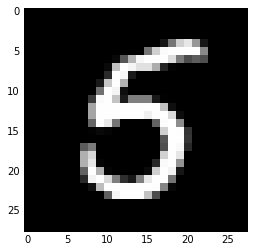

In [16]:
%matplotlib inline
# Input
this_input = random.sample(test_X, 1)[0]
imshow(np.reshape(this_input, (28, 28)), interpolation='nearest', cmap='Greys_r')

In [17]:
# Get output
this_output = sess.run(output, feed_dict={input_: [this_input]})

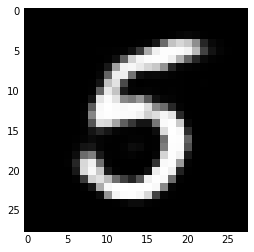

In [18]:
%matplotlib inline
# Output
imshow(np.reshape(this_output, (28, 28)), interpolation='nearest', cmap='Greys_r')